# 6. 방의 개수
#### lv.5
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/49190)

In [7]:
# 이미 방문했던 좌표에 다시 방문할 경구 -> 방이 생긴다.
# 단, 한번 지나갔던 경로를 통해 재방문 하할 경우 방이 생기지 않는다.
def solution(arrows):
    # 이동시 움직일 양을 담을 튜플
    moves = ((0,1), # 상
            (1,1),  # 우상
            (1,0),  # 우
            (1,-1), # 우하
            (0,-1), # 하
            (-1,-1),# 좌하
            (-1,0), # 좌
            (-1,1)) # 좌상
    
    # 현재 좌표를 담을 튜플(딕셔너리의 키값으로 사용해야하기 때문에 튜플로 선언)
    point = (0,0)
    # 방문한 좌표를 담을 딕셔너리
    # 지나갔던 방향(오고간것 둘다)을 담은 Set을 value로 가진다.
    visited = {}
    # 재방문한 좌표의 개수
    count = 0
    # 시작점을 방문처리
    visited[point] = set()
    for arrow in arrows:
        move = moves[arrow]
        # 한번에 두칸씩 이동
        # 두칸씩 이동하는 이유 -> 대각선 끼리 겹칠 경우의 방문처리를 위해
        for i in range(2):
            # 새로운 좌표를 구한다.
            n_point = (point[0]+move[0], point[1]+move[1])
            # 이전 좌표에 이동방향을 추가한다.
            visited[point].add(n_point)
            # 새로운 좌표가 방문한 적이 없다면
            if visited.get(n_point) == None:
                # 방문처리 (왔던 방향의 좌표를 입력.)
                visited[n_point] = {point,}
            # 새로운 좌표에 방문한 적이 있다면
            else:
                # 왔던 길이 아니라면
                if point not in visited[n_point]:
                    # 방문처리
                    visited[n_point].add(point)
                    # 방을 만든다.
                    count += 1
                # 왔던 길이라면 아무것도 하지 않는다.
            # 현재 좌표를 새로운 좌표로 바꾼다.
            point = n_point
    return count

In [8]:
arrows = [6, 6, 6, 4, 4, 4, 2, 2, 2, 0, 0, 0, 1, 6, 5, 5, 3, 6, 0]
solution(arrows)

3

## 성공
- 방이 생성되는 조건을 고민해봄.
    - 어떠한 좌표를 재방문 할 때마다 생성됨.
        - 지나갔던 간선인 경우엔 생성되지 않음.
    - 대각선끼리 교차되어도 생성
        - 2칸씩 이동하게 되면 대각선 교차또한 재방문으로 처리 가능.
- 어떤좌표로 어디까지 갈 지 모름.
    - 딕셔너리를 이용해 방문. -> None 반환될 경우 미방문
        - 좌표를 key값으로 사용하기 위해 튜플로 선언
        - value값으로는 이동한/이동해온 방향의 좌표를 set으로 가짐
            - set()을 통해, 이전좌표 방문지에 새좌표를 넣어줄때 중복제거
- 규칙만 잘 고민하니까 의외로 어렵지 않았음.

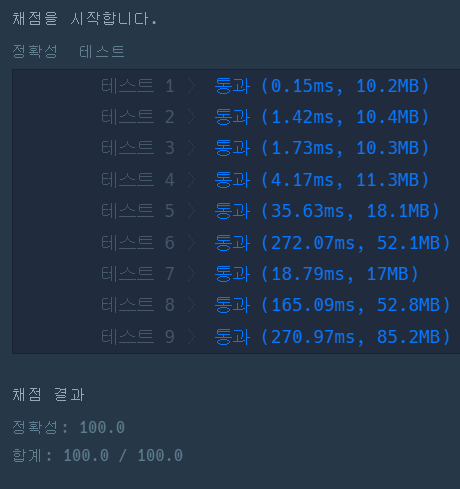